**Part 2 - Text Classification and Topic Modeling**

Part 2 - Text Classification and Topic Modeling

Dataset: economic_news.xlsx

The dataset contains news articles that are either relevant ("Yes") or not ("No") to business. You are required to build a classification model. Be sure to display the confusion matrix and classification report. Try the following algorithms: LogisticRegression, RandomForest, and Naive Bayes. In addition to performance metrics, you must use LIME to explore the words that are strong predictors of rellevance/irrelevance.

In addition to the prediction task, generate 10 topics using the Headline and Text. Display the top 20 words associated with each topic. The algorithms to be used are NMF, LSA (TruncatedSVD), and LDA.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Load dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/economic_news.xlsx'
df = pd.read_excel(file_path)
df.head()

,headline,text,relevance
0,Yields on CDs Fell in the Latest Week,NEW YORK -- Yields on most certificates of dep...,yes
1,The Morning Brief: White House Seeks to Limit ...,The Wall Street Journal Online</br></br>The Mo...,no
2,Banking Bill Negotiators Set Compromise --- Pl...,WASHINGTON -- In an effort to achieve banking ...,no
3,Manager's Journal: Sniffing Out Drug Abusers I...,The statistics on the enormous costs of employ...,no
4,Currency Trading: Dollar Remains in Tight Rang...,NEW YORK -- Indecision marked the dollar's ton...,yes


In [ ]:
# Combine 'headline' and 'text' columns
df['combined_text'] = df['headline'] + ' ' + df['text']
df.head()

,headline,text,relevance,combined_text
0,Yields on CDs Fell in the Latest Week,NEW YORK -- Yields on most certificates of dep...,yes,Yields on CDs Fell in the Latest Week NEW YORK...
1,The Morning Brief: White House Seeks to Limit ...,The Wall Street Journal Online</br></br>The Mo...,no,The Morning Brief: White House Seeks to Limit ...
2,Banking Bill Negotiators Set Compromise --- Pl...,WASHINGTON -- In an effort to achieve banking ...,no,Banking Bill Negotiators Set Compromise --- Pl...
3,Manager's Journal: Sniffing Out Drug Abusers I...,The statistics on the enormous costs of employ...,no,Manager's Journal: Sniffing Out Drug Abusers I...
4,Currency Trading: Dollar Remains in Tight Rang...,NEW YORK -- Indecision marked the dollar's ton...,yes,Currency Trading: Dollar Remains in Tight Rang...


In [ ]:
df['relevance'].value_counts()

,count
relevance,
no,6571
yes,1420
not sure,9


In [ ]:
df = df[df['relevance'] != 'not sure']

In [ ]:
# Convert relevance labels to binary
df['relevance'] = df['relevance'].map({'yes': 1, 'no': 0})
df.head()

,headline,text,relevance,combined_text
0,Yields on CDs Fell in the Latest Week,NEW YORK -- Yields on most certificates of dep...,1.0,Yields on CDs Fell in the Latest Week NEW YORK...
1,The Morning Brief: White House Seeks to Limit ...,The Wall Street Journal Online</br></br>The Mo...,0.0,The Morning Brief: White House Seeks to Limit ...
2,Banking Bill Negotiators Set Compromise --- Pl...,WASHINGTON -- In an effort to achieve banking ...,0.0,Banking Bill Negotiators Set Compromise --- Pl...
3,Manager's Journal: Sniffing Out Drug Abusers I...,The statistics on the enormous costs of employ...,0.0,Manager's Journal: Sniffing Out Drug Abusers I...
4,Currency Trading: Dollar Remains in Tight Rang...,NEW YORK -- Indecision marked the dollar's ton...,1.0,Currency Trading: Dollar Remains in Tight Rang...


In [ ]:
df.isnull().sum()

,0
headline,0
text,0
relevance,9
combined_text,0


In [ ]:
# Check and handle missing values in 'combined_text' and 'relevance'
df = df.dropna(subset=['combined_text', 'relevance'])
df.isnull().sum()

,0
headline,0
text,0
relevance,0
combined_text,0


Preprocessing the data

In [ ]:
import spacy
!python -m spacy download en_core_web_lg
nlp = spacy.load('en_core_web_lg')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
stopwords = list(ENGLISH_STOP_WORDS)
pos_tags = ['NOUN', 'ADJ']

In [ ]:
import re
def preprocess(txt):
  txt = txt.lower()
  txt = re.sub(r'[^A-Za-z]', ' ', txt)
  doc = nlp(txt)
  lemmatized_words = [word.lemma_ for word in doc if word.pos_ in pos_tags]
  cleaned_words = [word for word in lemmatized_words if word not in stopwords]
  return " ".join(cleaned_words)

In [ ]:
corpus = [preprocess(txt) for txt in df['combined_text'].tolist()]
labels = df['relevance'].tolist()

In [ ]:
corpus

['yield cd late week yield certificate deposit major bank tenth percentage point late week overall decline short term rate small denomination consumer cd bank average yield month deposit week yesterday bank survey banxquote money market information service month consumer deposit average yield week bank banxquote survey corestate threemonth small denomination cd decline small year consumer cd month month treasury auction fifth percentage point previous week',
 'morning brief child insurance program morning brief look day big news subscriber m business day e mail evening town summer recess mid weekend administration message state federal government tough national child insurance program offspring middle income family state child health insurance program child family t insurance qualify administration official time change program low income focus replacement private insurance administration point state official new restriction state coverage child family federal poverty level family famil

In [ ]:
labels

[1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

Building a classification model

In [ ]:
from sklearn.model_selection import train_test_split
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(corpus, labels, stratify = labels, test_size=0.3, shuffle = True, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Vectorize text using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Logistic Regression

Confusion Matrix for Logistic Regression:


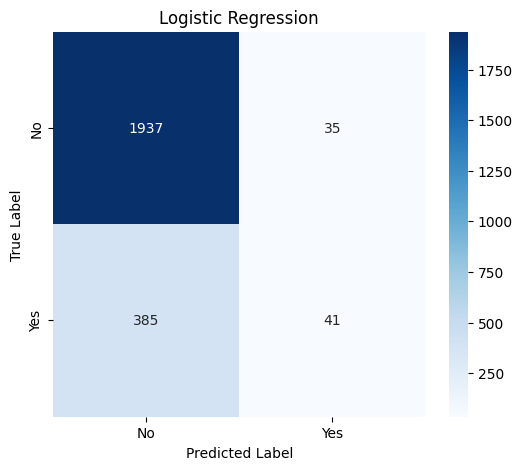

Classification Report for Logistic Regression:
               precision    recall  f1-score      support
0.0            0.834195  0.982252  0.902189  1972.000000
1.0            0.539474  0.096244  0.163347   426.000000
accuracy       0.824854  0.824854  0.824854     0.824854
macro avg      0.686834  0.539248  0.532768  2398.000000
weighted avg   0.781838  0.824854  0.770935  2398.000000


In [ ]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_tfidf, y_train)
y_pred_log_reg = log_reg.predict(X_test_tfidf)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
report_log_reg = classification_report(y_test, y_pred_log_reg, output_dict=True)

print("Confusion Matrix for Logistic Regression:")
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Logistic Regression")
plt.show()
print("Classification Report for Logistic Regression:\n", pd.DataFrame(report_log_reg).transpose())


Random Forest


Confusion Matrix for Random Forest:


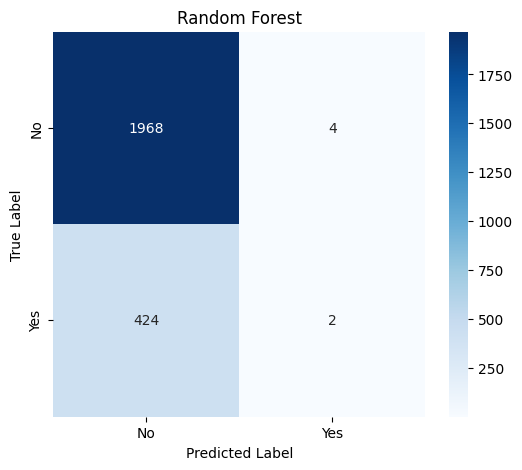

Classification Report for Random Forest:
               precision    recall  f1-score      support
0.0            0.822742  0.997972  0.901925  1972.000000
1.0            0.333333  0.004695  0.009259   426.000000
accuracy       0.821518  0.821518  0.821518     0.821518
macro avg      0.578038  0.501333  0.455592  2398.000000
weighted avg   0.735800  0.821518  0.743345  2398.000000


In [ ]:
# Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_tfidf, y_train)
y_pred_rf = random_forest.predict(X_test_tfidf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

print("\nConfusion Matrix for Random Forest:")
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest")
plt.show()
print("Classification Report for Random Forest:\n", pd.DataFrame(report_rf).transpose())

Naive Bayes

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Confusion Matrix for Naive Bayes:


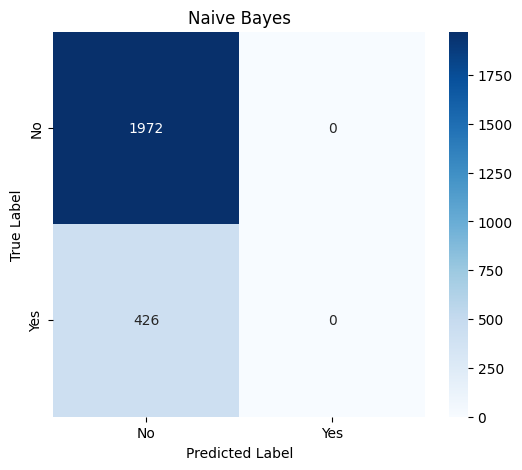

Classification Report for Naive Bayes:
               precision    recall  f1-score      support
0.0            0.822352  1.000000  0.902517  1972.000000
1.0            0.000000  0.000000  0.000000   426.000000
accuracy       0.822352  0.822352  0.822352     0.822352
macro avg      0.411176  0.500000  0.451259  2398.000000
weighted avg   0.676263  0.822352  0.742187  2398.000000


In [ ]:
# Naive Bayes
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf, y_train)
y_pred_nb = naive_bayes.predict(X_test_tfidf)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb, output_dict=True)

print("\nConfusion Matrix for Naive Bayes:")
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Naive Bayes")
plt.show()
print("Classification Report for Naive Bayes:\n", pd.DataFrame(report_nb).transpose())

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=1d6de761b768225e83883e5b9fddcee5d52c92449e0763dbae2c68848a9168c5
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


LIME to explore the words that are strong predictors of rellevance/irrelevance

In [ ]:
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline

In [ ]:
X_test[0]

'narrow izpst mcrve stock market today second record day light trading snow temperature factor portion market minded folk place stock volume share yesterday small share stock narrow minus sign stock wide day feature lorillard amazing advance past year word time ripe profit stock yesterday role market leader heavy selling'

In [ ]:
y_pred_prob = log_reg.predict_proba(X_train_tfidf)[:,1]
c = make_pipeline(tfidf_vectorizer, log_reg)
mystring = list(X_test)[1]
print(c.predict_proba([mystring]))

[[0.92812714 0.07187286]]


In [ ]:
class_names = ['Negative', 'Positive']
explainer = LimeTextExplainer(class_names=class_names)
exp = explainer.explain_instance(mystring, c.predict_proba, num_features=20)
exp.as_list()

[('postal', -0.042213058095438606),
 ('period', 0.015824574120259335),
 ('yesterday', -0.013695146897459284),
 ('percent', -0.012128866763500107),
 ('official', -0.010966937399034527),
 ('week', 0.010475066336797718),
 ('deficit', 0.00938522446708506),
 ('governor', -0.008836882389510147),
 ('earning', 0.007905040227728007),
 ('year', 0.007436529883012361),
 ('quarter', 0.00739639536895645),
 ('board', 0.007251199707462143),
 ('increase', 0.0068207262920254134),
 ('service', -0.00665765354523412),
 ('profit', 0.005667388823505584),
 ('mail', -0.004247082823347782),
 ('electronic', -0.003820894776937897),
 ('fourth', 0.0036616691845432385),
 ('subject', -0.0033417959476584064),
 ('cost', -0.003167706523061924)]

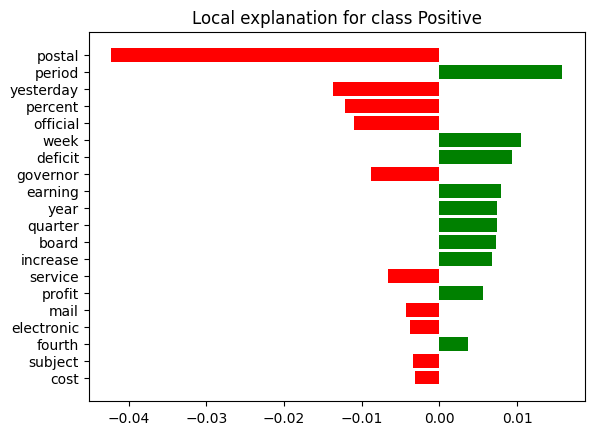

In [ ]:
%matplotlib inline
fig = exp.as_pyplot_figure()

In [ ]:
exp.show_in_notebook(text=False)

Topic Modeling

In [ ]:
from sklearn.decomposition import NMF, TruncatedSVD, LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Parameters for topic modeling
n_topics = 10
n_top_words = 20

# Vectorize text using TF-IDF for NMF and LSA
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_text'])

# Vectorize text using Count Vectorizer for LDA
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
count_matrix = count_vectorizer.fit_transform(df['combined_text'])

# Helper function to display topics
def display_topics(model, feature_names, n_top_words, model_name):
    print(f"\nTop words for topics generated by {model_name}:")
    for topic_idx, topic in enumerate(model.components_):
        message = f"Topic #{topic_idx+1}: " + " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

In [ ]:
# NMF Model
nmf_model = NMF(n_components=n_topics, random_state=42)
nmf_model.fit(tfidf_matrix)
display_topics(nmf_model, tfidf_vectorizer.get_feature_names_out(), n_top_words, "NMF")


Top words for topics generated by NMF:
Topic #1: unemployment jobs labor 000 workers job jobless employment rate work economy report department recession number cent month people benefits claims
Topic #2: stock stocks dow market points index average shares jones york trading industrial new day issues today volume nasdaq exchange ûªs
Topic #3: fed rates reserve federal policy bank rate greenspan banks central inflation chairman economy credit term bernanke meeting officials committee growth
Topic #4: tax budget president house bush spending congress taxes administration senate government ûªs plan cuts cut white state democrats reagan economic
Topic #5: dollar yen currency euro japanese trading york foreign marks currencies japan traders gold late new german markets west exchange central
Topic #6: bond bonds investors funds treasury yield rates yields market year fund treasurys prices term 32 money securities 30 stocks mutual
Topic #7: billion deficit trade imports exports budget year f

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [ ]:
# LSA (TruncatedSVD) Model
lsa_model = TruncatedSVD(n_components=n_topics, random_state=42)
lsa_model.fit(tfidf_matrix)
display_topics(lsa_model, tfidf_vectorizer.get_feature_names_out(), n_top_words, "LSA (TruncatedSVD)")


Top words for topics generated by LSA (TruncatedSVD):
Topic #1: market said percent stock year rates rate fed prices new stocks inflation economy dollar economic federal dow index investors billion
Topic #2: stock stocks market dow points index shares trading average jones york industrial nasdaq day investors issues volume exchange rally composite
Topic #3: fed dollar rates yen bank bond reserve central currency banks policy federal markets euro term bonds treasury greenspan investors inflation
Topic #4: percent rate inflation prices fed consumer rose rates department labor sales month growth economy index quarter reported report unemployment price
Topic #5: dollar yen trade deficit currency billion euro japan japanese exports foreign imports sales currencies quarter marks goods china gold department
Topic #6: funds mortgage fund billion company quarter investors companies sales banks year bonds loans home bond securities mutual money debt bank
Topic #7: billion deficit bond prices bu

In [ ]:
# LDA Model
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(count_matrix)
display_topics(lda_model, count_vectorizer.get_feature_names_out(), n_top_words, "LDA")


Top words for topics generated by LDA:
Topic #1: year percent said rate quarter economy sales billion growth month economic department consumer rose report months new reported increase labor
Topic #2: health years care social budget government workers said security people work city new state president time county spending employees million
Topic #3: trade world china economic president countries ûªs united american international administration policy mr states foreign said nations europe country political
Topic #4: tax year unemployment percent ûªs budget president state economic new income federal taxes 000 rate inflation said cent government increase
Topic #5: prices oil price inflation energy money food just gas mr years like says time good economy growth year economic market
Topic #6: said bank banks federal financial loans credit new board reserve loan company chairman fed government billion banking million mr securities
Topic #7: rates fed dollar economy federal inflation rate s